In [1]:
import sys
import os
import numpy as np
sys.path.insert(1, '../src/')
from config import raw_data_path, univariate_data_path, processed_data_path, models_path
from preprocessing_modules import EHGRecord, trim_target, filter_target, z_normalize_target, check_normalize_target, remove_records
import scipy.io
import pandas as pd

In [2]:
target_data_path = os.path.join(raw_data_path, 'target_data.npy')
data = np.load(target_data_path, allow_pickle=True)

In [3]:
records_to_remove = [
    'Hopper-2022_02_10_06_02_17-0000010181-0012',
    'Hopper-2022_10_02_01_32_56-0000010181-0002',
    'Hopper-2022_10_23_16_07_47-0000010090-0001'
]

target_data = remove_records(data, records_to_remove)
data = trim_target(data, 'target')
data = filter_target(data)
data = z_normalize_target(data)

In [4]:
save_path = os.path.join(processed_data_path, 'target_preprocessed.npy')
np.save(save_path, np.array(data, dtype=object))

In [8]:
dataset_name = 'target'
print('Statistics of', dataset_name)
data_path_original = os.path.join(raw_data_path, dataset_name + '_data.npy')
data_original = np.load(data_path_original, allow_pickle=True)
data_path_preprocessed = os.path.join(processed_data_path, dataset_name + "_preprocessed.npy")
print(data_path_preprocessed)
data_preprocessed = np.load(data_path_preprocessed, allow_pickle=True)
print('type of data preprocessed: ', type(data_preprocessed))
print("Type of data_preprocessed:", type(data_preprocessed))

if isinstance(data_preprocessed, np.ndarray) and data_preprocessed.shape == ():
    data_preprocessed = data_preprocessed.item()  # Unpack the object

print("After unpacking, type:", type(data_preprocessed))

# If it's a list, access the first entry
if isinstance(data_preprocessed, list):
    print("First entry:", data_preprocessed[0] if data_preprocessed else "Empty dataset!")


print(data_preprocessed[0])
print(f"Total number of entries before: {len(data_original)}")
print(f"Total number of entries after: {len(data_preprocessed)}")
# Extract sequence lengths




sequence_lengths_original = np.array([entry['signal'].shape[0] for entry in data_original])
sequence_lengths_processed = np.array([entry['signal'].shape[0] for entry in data_preprocessed])

# Compute statistics
print('BEFORE PREPROCESSING')
print(f"Max sequence length: {np.max(sequence_lengths_original)}")
print(f"Min sequence length: {np.min(sequence_lengths_original)}")
print(f"Mean sequence length: {np.mean(sequence_lengths_original):.2f}")
# print(f"Standard deviation of sequence lengths: {np.std(sequence_lengths):.2f}"

print('AFTER PREPROCESSING')
print(f"Max sequence length: {np.max(sequence_lengths_processed)}")
print(f"Min sequence length: {np.min(sequence_lengths_processed)}")
print(f"Mean sequence length: {np.mean(sequence_lengths_processed):.2f}")

# Count entries with 'preterm' as None
none_count = sum(1 for entry in data_preprocessed if entry['preterm'] is None)

print(f"Number of entries with 'preterm' as None: {none_count}")
18463872 - 18463872

Statistics of target
../data/processed/target_preprocessed.npy
type of data preprocessed:  <class 'numpy.ndarray'>
Type of data_preprocessed: <class 'numpy.ndarray'>
After unpacking, type: <class 'numpy.ndarray'>
{'record_name': np.str_('Hopper-2023_05_25_12_03_38-0000010090-0003'), 'signal': array([[ -3.4528623 , -17.36775705, -11.05391952,  -3.46650686,
         -2.6896713 ,  -1.84537916],
       [ -3.39068175, -17.07373422, -10.8699895 ,  -3.41311593,
         -2.6480211 ,  -1.81727669],
       [ -3.32876095, -16.78078961, -10.68671023,  -3.35987783,
         -2.60649057,  -1.78925403],
       ...,
       [  0.60066929,   0.2995247 ,   0.3930668 ,  -0.31037572,
         -0.51762818,   0.23008789],
       [  0.6006698 ,   0.29952186,   0.39306581,  -0.31037678,
         -0.51762974,   0.23008839],
       [  0.6006702 ,   0.29951964,   0.39306503,  -0.31037761,
         -0.51763096,   0.23008877]]), 'fs': np.int64(128), 'preterm': 0}
Total number of entries before: 167
Total number of

NameError: name 'plt' is not defined

before preprocessing
('Hopper-2023_05_25_12_03_38-0000010090-0003', array([[-1.14440918e-01, -1.14440918e-01,  0.00000000e+00,
         1.14440918e-01,  0.00000000e+00,  1.14440918e-01],
       [ 9.84191895e+00,  9.95635986e+00, -1.00708008e+01,
        -1.99127197e+01,  1.14440918e-01, -2.00271606e+01],
       [ 1.31607056e+01,  1.32751465e+01, -1.33895874e+01,
        -2.65502930e+01,  1.14440918e-01, -2.66647339e+01],
       ...,
       [ 1.43051147e+02, -1.87088013e+03,  1.58718115e+03,
         1.44413000e+03, -2.01393127e+03,  3.45806128e+03],
       [ 1.82579041e+03, -1.36024475e+03, -1.47365576e+03,
        -3.29944629e+03, -3.18603516e+03, -1.13411011e+02],
       [ 1.91116333e+03, -9.61761475e+02, -1.79821021e+03,
        -3.70937354e+03, -2.87292480e+03, -8.36448730e+02]], dtype=float32), 0, 128)


/home/nwertheim/Master-Thesis/thesisenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


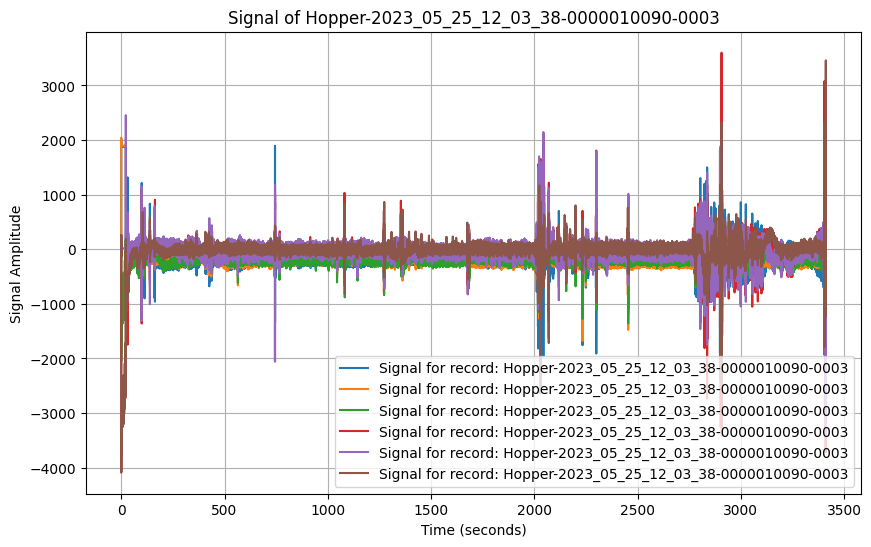

after preprocessing
{'record_name': np.str_('Hopper-2023_05_25_12_03_38-0000010090-0003'), 'signal': array([[ -3.4528623 , -17.36775705, -11.05391952,  -3.46650686,
         -2.6896713 ,  -1.84537916],
       [ -3.39068175, -17.07373422, -10.8699895 ,  -3.41311593,
         -2.6480211 ,  -1.81727669],
       [ -3.32876095, -16.78078961, -10.68671023,  -3.35987783,
         -2.60649057,  -1.78925403],
       ...,
       [  0.60066929,   0.2995247 ,   0.3930668 ,  -0.31037572,
         -0.51762818,   0.23008789],
       [  0.6006698 ,   0.29952186,   0.39306581,  -0.31037678,
         -0.51762974,   0.23008839],
       [  0.6006702 ,   0.29951964,   0.39306503,  -0.31037761,
         -0.51763096,   0.23008877]]), 'fs': np.int64(128), 'preterm': 0}


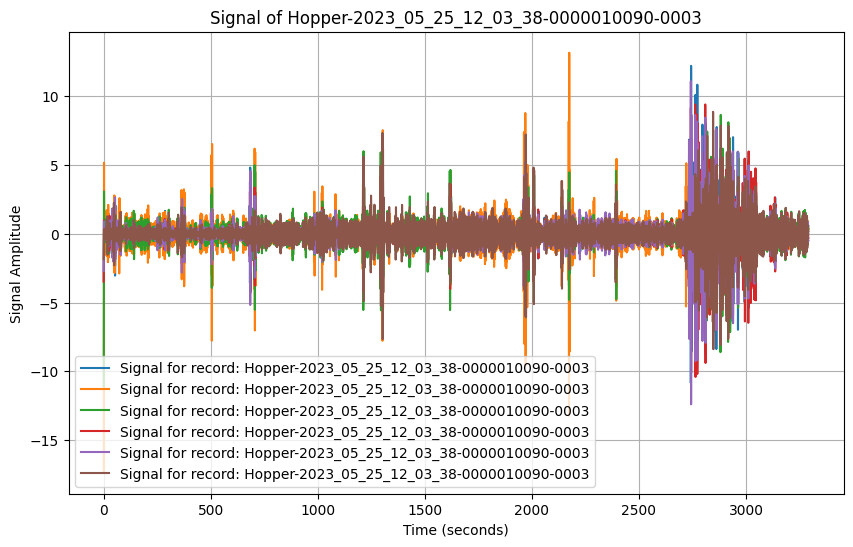

In [9]:
import matplotlib.pyplot as plt

print('before preprocessing')
sample_data = data_original[0]
print(sample_data)
# Extract the signal and sampling frequency
signal = sample_data['signal']
fs = sample_data['fs']

# Create time axis based on the signal length and sampling frequency
time = np.arange(len(signal)) / fs

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label=f"Signal for record: {sample_data['record_name']}")
plt.title(f"Signal of {sample_data['record_name']}")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")
plt.grid(True)
plt.legend()
plt.show()

print('after preprocessing')
sample_data = data_preprocessed[0]
print(sample_data)
# Extract the signal and sampling frequency
signal = sample_data['signal']
fs = sample_data['fs']

# Create time axis based on the signal length and sampling frequency
time = np.arange(len(signal)) / fs

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label=f"Signal for record: {sample_data['record_name']}")
plt.title(f"Signal of {sample_data['record_name']}")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")
plt.grid(True)
plt.legend()
plt.show()